In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Bayesian Q2

# considered Iris dataset

In [28]:
df = pd.read_excel('/content/drive/MyDrive/PA_1/Iris Dataset 3/irisdata.xlsx', header=None, names=['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class'])

In [29]:
df

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Appending features into their respective list to make histogram

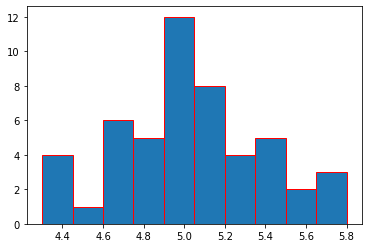

In [30]:
sepal_length = []
sepal_width = []
petal_width = []

for i in range(50):
    sepal_length.append(df['Sepal length'][i])

plt.hist(sepal_length, edgecolor='red')
plt.show()

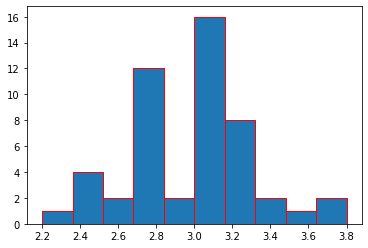

In [31]:
for i in range(100, 150):
    sepal_width.append(df['Sepal width'][i])

plt.hist(sepal_width, edgecolor='red')
plt.show()

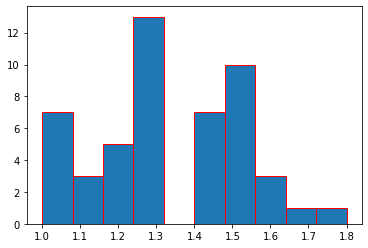

In [32]:
for i in range(50, 100):
    petal_width.append(df['Petal width'][i])

plt.hist(petal_width, edgecolor='red')
plt.show()

# Splitting training and testing data

In [33]:
class1_train = df.iloc[:35]
class2_train = df.iloc[50:85]
class3_train = df.iloc[100:135]

class1_test = df.iloc[35:50]
class2_test = df.iloc[85:100]
class3_test = df.iloc[135:150]

In [34]:
def mean(feature, given_class):
    return (sum(given_class[feature].values))/(len(given_class[feature].values))

def std(feature, given_class):
    avg = mean(feature, given_class)
    variance = sum([(x-avg)**2 for x in given_class[feature].values]) / float(len(given_class[feature].values)-1)
    return sqrt(variance)


def likelihood(x, mean, stdev):
    exponent = exp(-((x-mean)**2/(2*stdev**2)))   
    return exponent/(stdev*sqrt(2*np.pi))

In [35]:
def classify(x1, feature_name, class1_train, class2_train, class3_train):

    l11 = likelihood(x1, mean(feature_name, class1_train), std(feature_name, class1_train))
    l21 = likelihood(x1, mean(feature_name, class2_train), std(feature_name, class2_train))
    l31 = likelihood(x1, mean(feature_name, class3_train), std(feature_name, class3_train))

    p1 = l11*(1/3)
    p2 = l21*(1/3)
    p3 = l31*(1/3)

    if p1 > p2 and p1 > p3: 
        return 'Iris-setosa'

    elif p2 > p1 and p2 > p3: 
        return 'Iris-versicolor'

    elif p3 > p1 and p3 > p2: 
        return 'Iris-virginica'

# Accuracy prediction

In [36]:
from math import sqrt, exp, pi
count1, count2, count3, count4 = 0, 0, 0, 0

for i in range(15):
    x1 = classify(class1_test['Sepal length'].values[i], 'Sepal length', class1_train, class2_train, class3_train)
    x2 = classify(class2_test['Sepal width'].values[i], 'Sepal width', class1_train, class2_train, class3_train)
    x3 = classify(class3_test['Petal length'].values[i], 'Petal length', class1_train, class2_train, class3_train)
    
    if x1 == 'Iris-setosa':
        count1 += 1
    if x2 == 'Iris-versicolor':
        count2 += 1
    if x3 == 'Iris-virginica':
        count3 += 1
    
    
print(f'Accuracy of feature 1 "Sepal length" of class "Iris-Setosa"  = {100*count1/15}%')
print(f'Accuracy of feature 2 "Sepal width" of class "Iris-Versicolor" = {100*count2/15}%')
print(f'Accuracy of feature 3 "Petal length" of class "Iris-Virginica" = {100*count3/15}%')

Accuracy of feature 1 "Sepal length" of class "Iris-Setosa"  = 100.0%
Accuracy of feature 2 "Sepal width" of class "Iris-Versicolor" = 66.66666666666667%
Accuracy of feature 3 "Petal length" of class "Iris-Virginica" = 93.33333333333333%


# 2D histogram

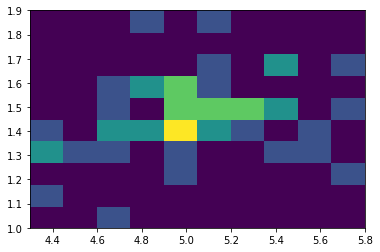

In [37]:
sepal_length_class1 = []
petal_length_class1 = []

for i in range(50):
    sepal_length_class1.append(df['Sepal length'][i])
    petal_length_class1.append(df['Petal length'][i])

plt.hist2d(sepal_length_class1, petal_length_class1)
plt.show()

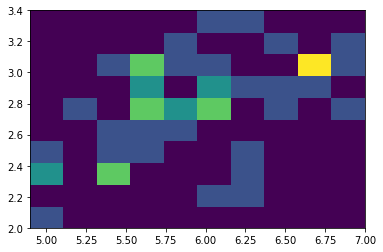

In [38]:
sepal_length_class2 = []
sepal_width_class2 = []

for i in range(50, 100):
    sepal_length_class2.append(df['Sepal length'][i])
    sepal_width_class2.append(df['Sepal width'][i])

plt.hist2d(sepal_length_class2, sepal_width_class2)
plt.show()

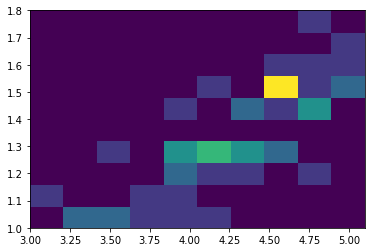

In [39]:
petal_length_class3 = []
petal_width_class3 = []

for i in range(50, 100):
    petal_length_class3.append(df['Petal length'][i])
    petal_width_class3.append(df['Petal width'][i])

plt.hist2d(petal_length_class3, petal_width_class3)
plt.show()